In [15]:
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
import torch
from torch import nn

In [2]:
model = PPO.load("models/breezy-shape-93/model")

In [3]:
model

In [4]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=28, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=28, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=3, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

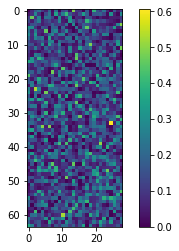

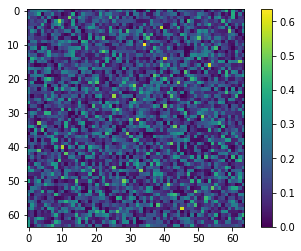

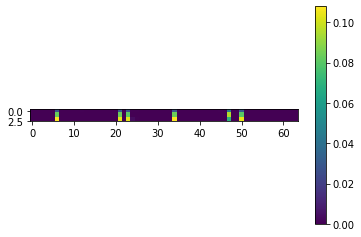

In [47]:
layer_0_weights = list(model.policy.mlp_extractor.policy_net[0].parameters())[0].detach().numpy()
layer_1_weights = list(model.policy.mlp_extractor.policy_net[2].parameters())[0].detach().numpy()
layer_2_weights = list(model.policy.action_net.parameters())[0].detach().numpy()

plt.imshow(np.abs(layer_0_weights), vmin=0)
plt.colorbar()
plt.show()
plt.imshow(np.abs(layer_1_weights), vmin=0)
plt.colorbar()
plt.show()
plt.imshow(np.abs(layer_2_weights), vmin=0)
plt.colorbar()
plt.show()

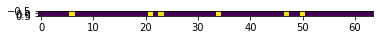

In [61]:
output_layer_input_importance = np.abs(layer_2_weights).sum(axis=0)

plt.imshow(output_layer_input_importance.reshape(1,-1), vmin=0)
plt.show()

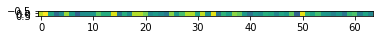

In [67]:
layer_1_input_product = np.abs(layer_2_weights) @ np.abs(layer_1_weights)
layer_1_input_importance = layer_1_input_product.sum(axis=0)

plt.imshow(layer_1_input_importance.reshape(1,-1), vmin=0)
plt.show()

In [68]:
(np.abs(layer_2_weights) @ np.abs(layer_1_weights)).shape

(3, 64)

In [52]:
layer_2_weights.shape

(3, 64)

In [53]:
layer_1_weights.shape

(64, 64)

In [55]:
(layer_2_weights @ layer_1_weights).shape

(3, 64)